In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("./mnist_784_csv.csv")
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [32]:
pixel_columns = list(data.columns)[:-1]
X = data[pixel_columns].values
y = data["class"].values

In [36]:
X.shape

(70000, 784)

In [38]:
from sklearn.model_selection import train_test_split

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=123) #train_size percentuale dei dati di training

In [359]:
from sklearn.neural_network import MLPClassifier

In [361]:
model = MLPClassifier(hidden_layer_sizes=(100,1000,60), random_state=987, max_iter=2000)

In [363]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 1000, 60), max_iter=2000,
              random_state=987)

In [364]:
model.score(X_test, y_test)

0.9751428571428571

In [365]:
model.score(X_train, y_train)

0.9974444444444445

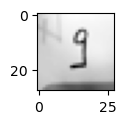

In [471]:
from PIL import Image
img = Image.open("opencv_frame_4.png")
imgGray = img.convert("L")
imgArray = np.array(imgGray.resize((28,28)))
threshold = 100
# Applica la soglia
img_threshold = np.where(imgArray > threshold, 0, 255)
img_g = 255 - imgArray

fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(np.array(img_g).reshape((28,28)), cmap="Greys")
plt.show()

In [473]:
model.predict(np.array(img_g).reshape(1,-1))

array([8], dtype=int64)

In [401]:
import joblib
joblib.dump(model,"./model_mlp.joblib")

['./model_mlp.joblib']

In [465]:
imgArray

array([[ 75,  80,  86,  97, 108, 115, 122, 127, 128, 129, 130, 133, 135,
        137, 138, 140, 140, 140, 139, 137, 134, 131, 128, 124, 119, 116,
        111, 106],
       [ 77,  83,  91, 102, 113, 121, 127, 131, 132, 133, 133, 136, 138,
        140, 142, 142, 143, 143, 141, 139, 137, 135, 132, 129, 124, 120,
        114, 109],
       [ 79,  85,  95, 108, 119, 127, 132, 134, 135, 135, 137, 139, 142,
        144, 145, 148, 151, 147, 144, 142, 140, 138, 136, 133, 129, 125,
        119, 113],
       [ 83,  88, 100, 113, 125, 132, 135, 136, 138, 138, 141, 143, 145,
        148, 151, 125,  79, 132, 151, 146, 144, 142, 139, 136, 132, 129,
        123, 116],
       [ 87,  94, 106, 118, 129, 135, 138, 140, 141, 142, 145, 147, 149,
        152, 158,  85,  22, 113, 156, 150, 148, 145, 141, 139, 136, 132,
        126, 119],
       [ 90,  99, 110, 123, 132, 136, 140, 143, 144, 146, 149, 151, 154,
        157, 154,  59,  29, 114, 160, 154, 152, 148, 145, 142, 139, 135,
        130, 123],
       [ 8